<a href="https://colab.research.google.com/github/VM-Janani/Linear-Algebra-The-Coding-Way/blob/main/Diagonalization/Diagonalization_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

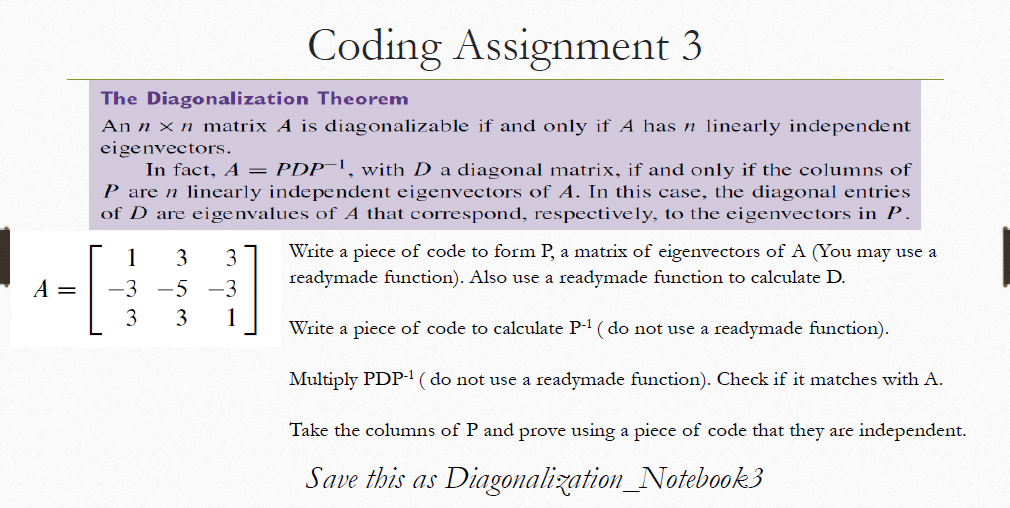

In [38]:
import numpy as np
import sympy as sp

In [39]:
def multiply_matrices(matrix1, matrix2):

    # Check if matrices can be multiplied
    if len(matrix1[0]) != len(matrix2):
        raise ValueError("Matrices cannot be multiplied. Number of columns in matrix1 must equal the number of rows in matrix2.")

    # Initialize result matrix with zeros
    result = [[0 for _ in range(len(matrix2[0]))] for _ in range(len(matrix1))]

    # Perform matrix multiplication
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result


In [56]:
def inverse_matrix(matrix):
    n = len(matrix)

    augmented_matrix = np.hstack([matrix, np.eye(n)])

    for i in range(n):
        pivot = augmented_matrix[i, i]
        if pivot == 0:
            # If the pivot is 0, swap with a row below to avoid division by 0
            for j in range(i+1, n):
                if augmented_matrix[j, i] != 0:
                    augmented_matrix[[i, j]] = augmented_matrix[[j, i]]
                    break
            pivot = augmented_matrix[i, i]
            if pivot == 0:
                raise ValueError("Matrix is singular and cannot be inverted.")
        augmented_matrix[i] /= pivot
        for j in range(n):
            if i != j:
                factor = augmented_matrix[j, i]
                augmented_matrix[j] -= factor * augmented_matrix[i]

    inverse = augmented_matrix[:, n:]

    return inverse


In [57]:
#function to find p matrix
def p_matrix(A):
  eigenvalues, eigenvectors = np.linalg.eig(A)
  return eigenvalues, eigenvectors

P , D ,P_inverse of A matirx

In [67]:
#define the matrix
A=[[1,3,3],
   [-3,-5,-3],
   [3,3,1]]
#to find the p matrix which contains the eigenvectors of A
eigenvalues, eigenvectors =  p_matrix(A)
print("P matrix")
P=eigenvectors
print(P)

#Digonal matirx
D = np.diag(eigenvalues)
print("Digonal matrix")
print(D)

#inverse matrix
P_inverse = inverse_matrix(P)
print("P inverse matrix")
print(P_inverse)

P matrix
[[ 5.77350269e-01 -1.28197512e-16 -6.72654054e-01]
 [-5.77350269e-01 -7.07106781e-01  7.37141689e-01]
 [ 5.77350269e-01  7.07106781e-01 -6.44876349e-02]]
Digonal matrix
[[ 1.  0.  0.]
 [ 0. -2.  0.]
 [ 0.  0. -2.]]
P inverse matrix
[[ 1.73205081  1.73205081  1.73205081]
 [-1.41421356 -1.2786323   0.13558127]
 [ 0.          1.48664829  1.48664829]]


comparison PDP_inverse to A


In [62]:
PD = multiply_matrices(P,D)
PDP1 = multiply_matrices(PD,P_inverse)

In [66]:
if np.allclose(PDP1, A):
    print("PDP_inv matches A")
else:
    print("PDP_inv does not match A")

PDP_inv matches A


Independence of p matrix

In [49]:
M_sympy = sp.Matrix(P)

# Reduce M to its Reduced Row Echelon Form (RREF)
RREF, pivot_columns = M_sympy.rref()
print("\nRREF of P:")
print(RREF)


RREF of P:
Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])


Number of non-zero rows: 3

The Eigenvalues are distinct & the Eigenvectors are linearly independent.